# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [39]:
%matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
fifa.insert(loc=7, column='ValueNumeric', value=fifa['Value'].str.strip('€MK').astype(float))

In [5]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,ValueNumeric,Preferred Foot,Position,...,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,110.5,Left,RF,...,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,77.0,Right,ST,...,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,118.5,Right,LW,...,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,72.0,Right,GK,...,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,102.0,Right,RCM,...,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   ValueNumeric    18207 non-null  float64
 8   Preferred Foot  18159 non-null  object 
 9   Position        18147 non-null  object 
 10  Weak Foot       18159 non-null  float64
 11  Acceleration    18159 non-null  float64
 12  SprintSpeed     18159 non-null  float64
 13  Stamina         18159 non-null  float64
 14  Strength        18159 non-null  float64
 15  LongShots       18159 non-null  float64
 16  Aggression      18159 non-null  float64
 17  Interceptions   18159 non-null 

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [26]:
# Your code here:
fifa[['Name', 'ValueNumeric','Preferred Foot','Position']].head()

,Name,ValueNumeric,Preferred Foot,Position
0,L. Messi,110.5,Left,RF
1,Cristiano Ronaldo,77.0,Right,ST
2,Neymar Jr,118.5,Right,LW
3,De Gea,72.0,Right,GK
4,K. De Bruyne,102.0,Right,RCM


In [30]:
model_foot_position = smf.ols(formula='fifa["ValueNumeric"]~C(fifa["Preferred Foot"])+C(fifa["Position"])', data=fifa).fit()
anova_table = sm.stats.anova_lm(model_foot_position, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",7.292211e+04,1.0,0.871795,3.504713e-01
"C(fifa[""Position""])",8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:
# The p-value -PR(>F)- is smaller than 0.05 in both cases. Therefore, we can reject the null hypothesis.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [31]:
# Your code here:
model_nationality = smf.ols(formula='fifa["ValueNumeric"]~C(fifa["Nationality"])', data=fifa).fit()
anova_table = sm.stats.anova_lm(model_nationality, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# The p-value -PR(>F)- is smaller than 0.05, therefore, we can reject the null hypothesis.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [32]:
# Your code here:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
ValueNumeric        0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
dtype: int64

In [33]:
fifa.dropna(how='any', axis=0, inplace=True)

In [34]:
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
ValueNumeric      0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [36]:
# Your code here:
X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
y = fifa['ValueNumeric']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Sun, 23 May 2021   Prob (F-statistic):             0.0116
Time:                        19:37:29   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
# R-squared states that the model is not explained by the variables stamina and sprint speed.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [37]:
# Your code here:
X = sm.add_constant(fifa[['Potential']])
y = fifa['ValueNumeric']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Sun, 23 May 2021   Prob (F-statistic):          9.15e-225
Time:                        19:41:26   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
# The model is not explained by the variable 'Potential' either.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

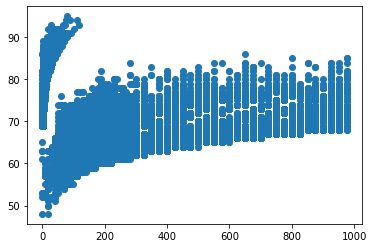

In [41]:
# Your code here:
_ = plt.scatter(x=fifa['ValueNumeric'], y=fifa['Potential'])